In [1]:
import numpy as np
import elimination_ordering_nx as eo
import time, pickle
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

q = [ 2  4  8 16 32 64]
p = [ 2  4  8 16 32 64]
computation for grid 2 x 2 is finished!
computation for grid 4 x 4 is finished!
computation for grid 8 x 8 is finished!
computation for grid 16 x 16 is finished!
computation for grid 32 x 32 is finished!
computation for grid 64 x 64 is finished!

<><><> Separators for p = 4 q = 4 <><><>


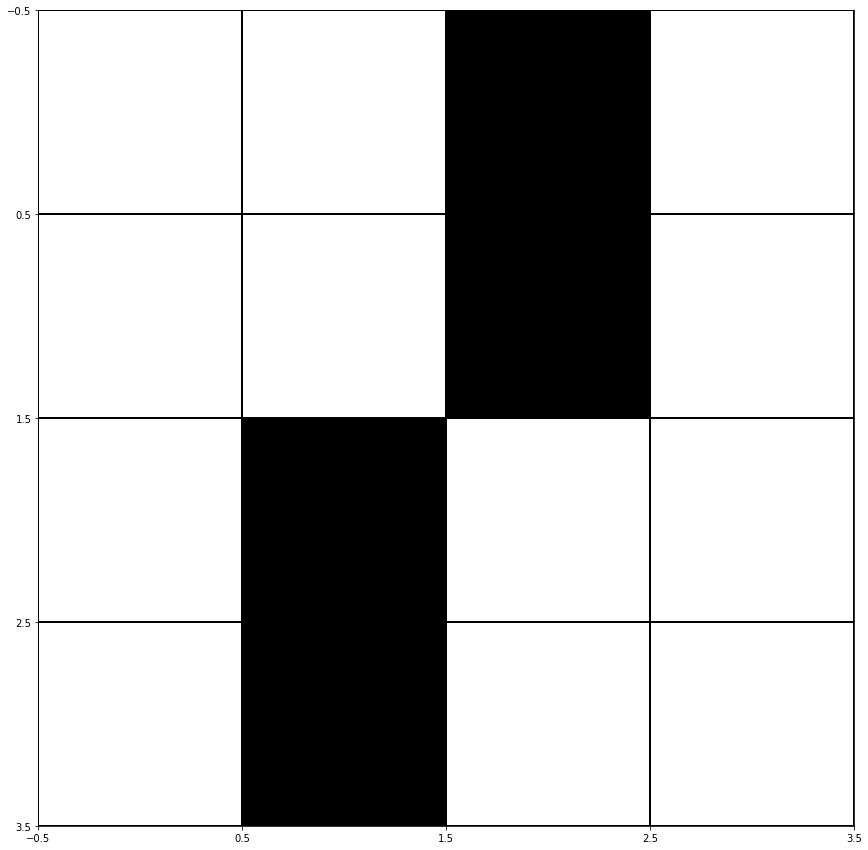


<><><> Separators for p = 8 q = 8 <><><>


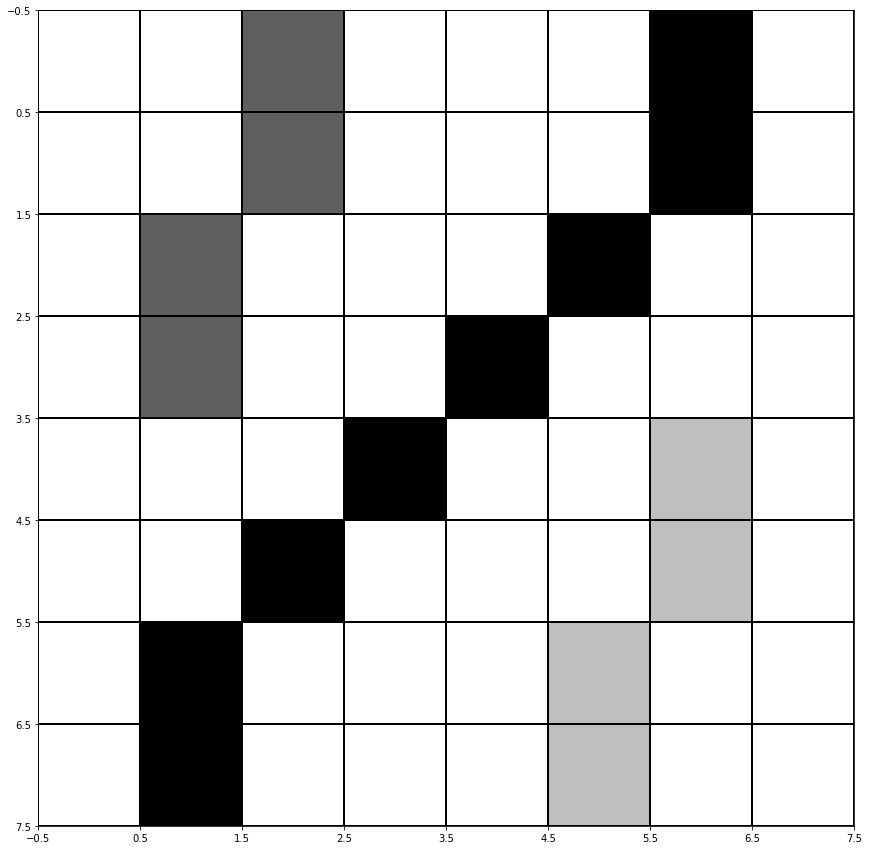


<><><> Separators for p = 16 q = 16 <><><>


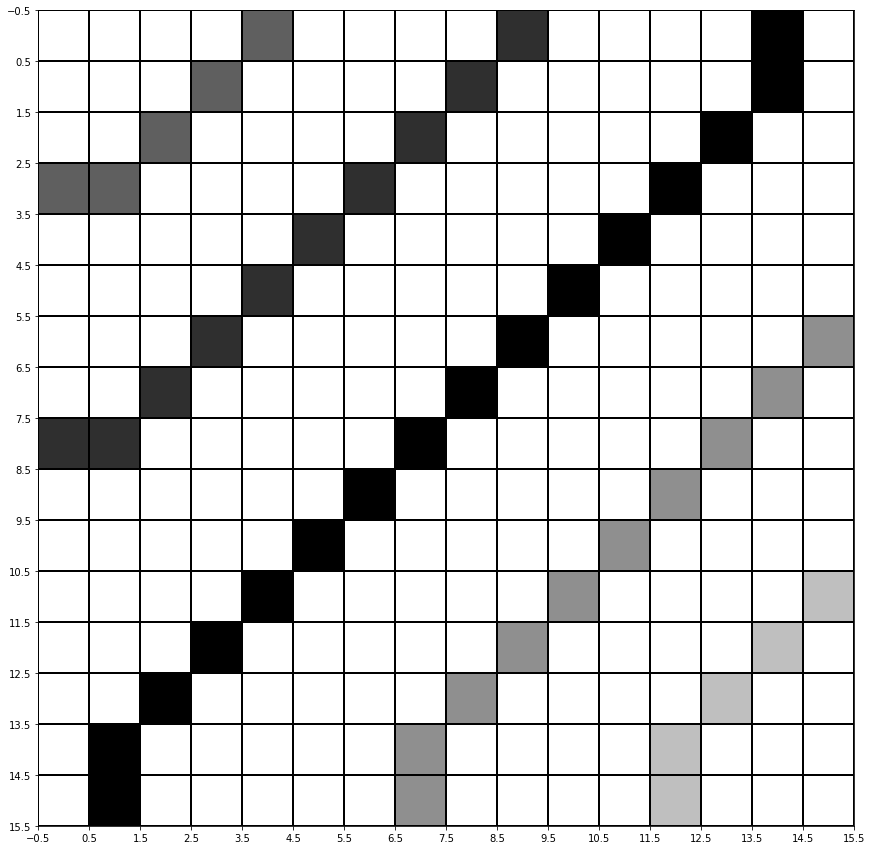


<><><> Separators for p = 32 q = 32 <><><>


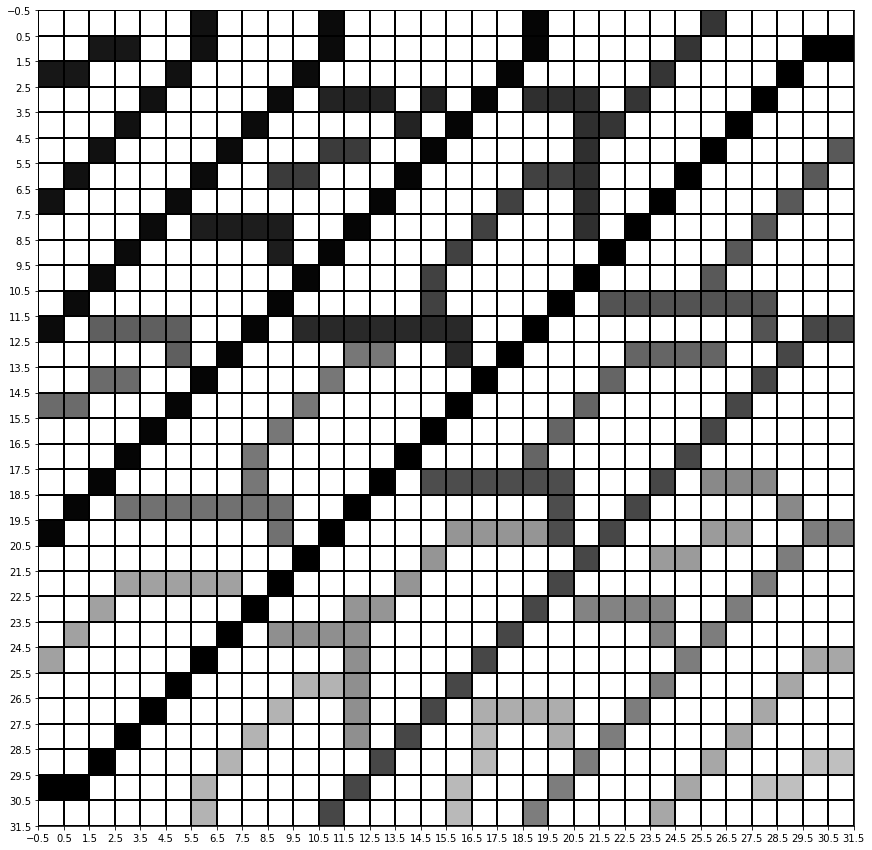


<><><> Separators for p = 64 q = 64 <><><>


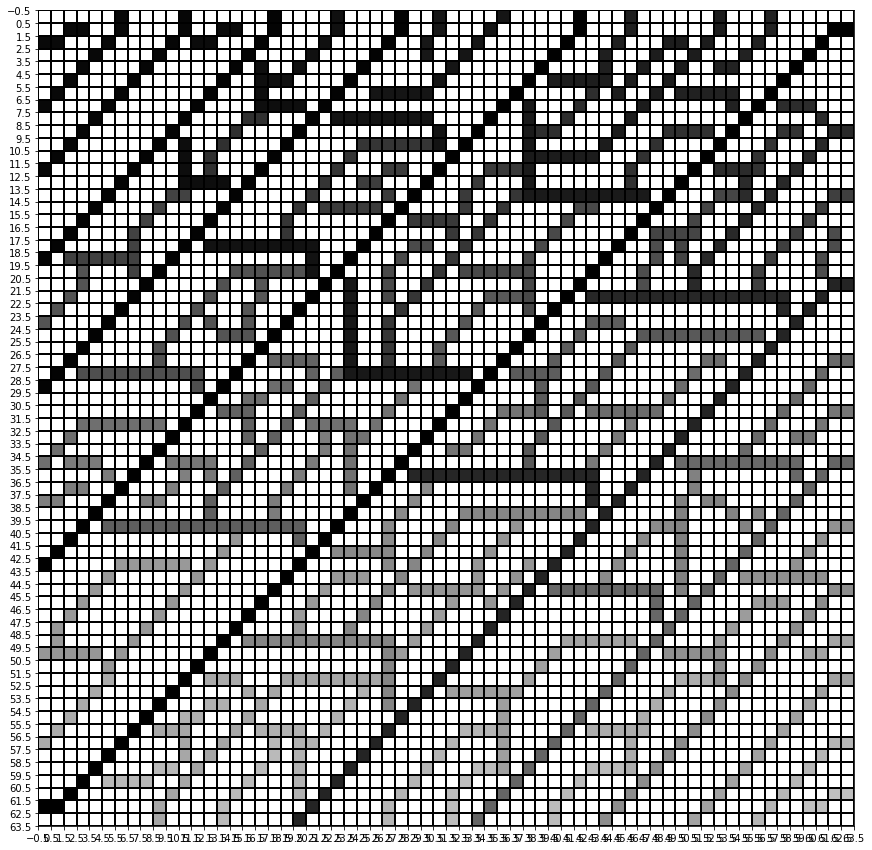

In [2]:
'''First round visualization only:'''
plt.rcParams["figure.figsize"] = (20,15)
#p = [2,5,5,25]
#q = [4,5,25,25]
k = np.array(list(range(1,7)))
q = p = np.power(2,k)
print("q =",q)
print("p =",p)
info = {
    "R_counts":[],
    "separate_placed_rounds":[],
    "Nks":[]
       }

for i in range(len(p)):
    #print("\n\n=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-=-=-=--=-=-=-=--=--=-=-=-=-=-=--=-=-=-=-")
    #print("<><><> Grid with p =",p[i],"q =",q[i],"<><><>")
    grid = eo.grid_generator(p[i],q[i]) #generate grid matrix

    #elimination ordering:
    EO = eo.elimination_ordering_class(grid, visualization=False, p=p[i], q=q[i]) #must be on global scope
    #e, R_counts, separate_placed_rounds = EO.elimination_ordering(grid) #if visualization=True
    e = EO.elimination_ordering(grid)
    #info["R_counts"].append(R_counts); info["separate_placed_rounds"].append(separate_placed_rounds)
    info["Nks"].append(EO.Nks)
    
    print("computation for grid",p[i],"x",q[i],"is finished!")
    
#display the separator grids:
for i in range(len(p)):
    if len(info["Nks"][i]) > 0:
        print("\n<><><> Separators for p =",p[i],"q =",q[i],"<><><>")
        eo.generate_separator_display(p[i], q[i], info["Nks"][i])